# Data-driven computational mechanics solver for truss structures

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

plt.style.use('ggplot')

%matplotlib inline

# Check the location

In [7]:
print('Working directory: ')
!pwd 
print('\n.med file to use: ')
!ls *.med
print('\nparam_file.petsc :')
!cat param_file.petsc

Working directory: 
/Users/adriana/Documents/Meshes_for_DD/Square

.med file to use: 
square.med

param_file.petsc :
-my_order 1
-my_dummy_k -3
-my_dummy_range 5
-my_dummy_count 100000
-my_dummy_noise 0.1

-pc_type lu
-pc_factor_mat_solver_package mumps
-ksp_type fgmres
-ksp_monitor
-ksp_converged_reason
-ksp_rtol 1e-8
-ksp_atol 1e-8



# Run begining analysis
analysis without data set to be compared to the data-driven later

In [8]:
!read_med -med_file *.med
!mofem_part -my_file out.h5m -output_file input_mesh.h5m -my_nparts 1 -dim 2 -adj_dim 1
!poisson_H -file_name input_mesh.h5m

[0] <inform> MoFEM version 0.10.0 (MOAB 5.1.0 Petsc Release Version 3.11.3, Jun, 26, 2019 )
[0] <inform> git commit id 064a7859c24c245cece2e22f4476c3c622f73af5
[0] <inform> Local time: 2020-11-4 16:57:20
[0] <inform> UTC time: 2020-11-4 16:57:20
[0] <inform> [MedInterface] Reading MED file V4.0.0 using MED library V4.0.0
[0] <inform> [MedInterface] Check mesh untitled nsteps 1
[0] <inform> [MedInterface] Reading mesh untitled nsteps 1
[0] <inform> [MedInterface] Read number of nodes 98
[0] <inform> [read_med] Print all meshsets (old and added from meshsets configurational file
[0] <inform> [read_med] meshset 12682136550675316737 type BLOCKSET UNKNOWNNAME msId 1 name untitled
[0] <inform> [read_med] meshset 12682136550675316738 type BLOCKSET UNKNOWNNAME msId 2 name BOUNDARY_CONDITION             
[0] <inform> [read_med] meshset 12682136550675316739 type BLOCKSET UNKNOWNNAME msId 3 name BOUNDARY_Q_BAR                 
[0] <inform> MoFEM version 0.10.0 (MOAB 5.1.0 Petsc Release Version 3.

# Check the analysis without data set to choose appropriate values

In [9]:
!mbconvert out_ori_result.h5m out_ori_result.vtk
!open out_ori_result.vtk

print('\nPlease check the maximum absolute value of pressure (P_reference) from the reference FEM just performed. \nWhat is max pressure? (smiley: 7.5e-1)')
in_max_p = input("Max absolute pressure? ")
max_p = float(in_max_p)
print('Max reference pressure is:', max_p)

print('\nPlease check the maximum grad(p) in x and y directions from the reference FEM just performed. \nWhat is it? (smiley: 3.6)')
in_max_grad_p=input("Max grad(p) in one direction? ")
max_grad_p = float(in_max_grad_p)

print('Max grad(p) in one direction is:', max_grad_p)
print('\nPlease choose apropriate range (this will be used in creating a dummy data set):')

in_range_guess=input('Choose an appropriate range for grad(p) in the dummy data set:')
range_guess = float(in_range_guess)

while range_guess < max_grad_p:
    print('Range chosen is', range_guess, ', this is smaller than max grad(p). \nPlease choose a new one:')
    in_range_guess=input()
    range_guess = float(in_range_guess)

print('Range for analysis is', range_guess)

in_range = range_guess

Read "out_ori_result.h5m"
Wrote "out_ori_result.vtk"

Please check the maximum absolute value of pressure (P_reference) from the reference FEM just performed. 
What is max pressure? (smiley: 7.5e-1)
Max reference pressure is: 3.3

Please check the maximum grad(p) in x and y directions from the reference FEM just performed. 
What is it? (smiley: 3.6)
Max grad(p) in one direction is: 3.3

Please choose apropriate range (this will be used in creating a dummy data set):
Range for analysis is 4.0


# *** RUN analysis ***
with 0 noise and varying number of data points

In [58]:
in_order = 1
in_k = -3
# in_range = 4
# in_count = 10000
in_noise = 0

!rm sumanalys.csv
!rm errors*

for i in range(1,7):
    for j in range(1,10,2):
        in_count = j * (10**i)
        !poisson_dd_H -file_name analysis_mesh.h5m -my_order {in_order} -my_dummy_k {in_k} -my_dummy_range {in_range} -my_dummy_count {in_count} -my_dummy_noise {in_noise} -skip_vtk 1

!mv ./sumanalys.csv ./numberAnalysis00.csv

[DD] -my_dummy_k -3
[0] <inform> [DD] -my_dummy_range 4
[0] <inform> [DD] -my_dummy_count 3000000
[0] <inform> [DD] -my_dummy_noise 0
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316737 type BLOCKSET UNKNOWNNAME msId 1 name untitled
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316738 type BLOCKSET UNKNOWNNAME msId 2 name BOUNDARY_CONDITION             
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316739 type BLOCKSET UNKNOWNNAME msId 3 name BOUNDARY_Q_BAR                 
The P_reference field is here :D
The L_reference field is here :D
[0] <inform> [FieldCore] Add field P field_id 4 space H1 approximation base AINSWORTH_LEGENDRE_BASE rank 1 meshset 12682136550675316748
[0] <inform> [FieldCore] Add field Q field_id 8 space L2 approximation base AINSWORTH_LEGENDRE_BASE rank 2 meshset 12682136550675316749
[0] <inform> [FieldCore] Add field L field_id 16 space H1 approximation base AINSWORTH_LEGENDRE_BASE rank 1 meshset 126821365506

# Noise and number of points analysis

In [53]:
in_order = 1
in_k = -3
# in_range = 4
# in_count = 10000
# in_noise = 0

!rm sumanalys.csv
!rm errors*

in_noise = 0.1
for i in range(1,7):
    for j in range(1,10,2):
        in_count = j * (10**i)
        !poisson_dd_H -file_name analysis_mesh.h5m -my_order {in_order} -my_dummy_k {in_k} -my_dummy_range {in_range} -my_dummy_count {in_count} -my_dummy_noise {in_noise} -skip_vtk 1
!mv ./sumanalys.csv ./numberAnalysis01.csv

in_noise = 0.5
for i in range(1,7):
    for j in range(1,10,2):
        in_count = j * (10**i)
        !poisson_dd_H -file_name analysis_mesh.h5m -my_order {in_order} -my_dummy_k {in_k} -my_dummy_range {in_range} -my_dummy_count {in_count} -my_dummy_noise {in_noise} -skip_vtk 1
!mv ./sumanalys.csv ./numberAnalysis05.csv

in_noise = 1
for i in range(1,7):
    for j in range(1,10,2):
        in_count = j * (10**i)
        !poisson_dd_H -file_name analysis_mesh.h5m -my_order {in_order} -my_dummy_k {in_k} -my_dummy_range {in_range} -my_dummy_count {in_count} -my_dummy_noise {in_noise} -skip_vtk 1
!mv ./sumanalys.csv ./numberAnalysis10.csv

[petsc]   1 KSP Residual norm 1.431036322136e-14 
[0] <inform> [petsc] Linear solve converged due to CONVERGED_ATOL iterations 1
[0] <inform> MoFEM version 0.10.0 (MOAB 5.1.0 Petsc Release Version 3.11.3, Jun, 26, 2019 )
[0] <inform> git commit id 064a7859c24c245cece2e22f4476c3c622f73af5
[0] <inform> Local time: 2020-11-5 14:13:58
[0] <inform> UTC time: 2020-11-5 14:13:58
[0] <inform> [DD] -my_order 1
[0] <inform> [DD] -my_dummy_k -3
[0] <inform> [DD] -my_dummy_range 4
[0] <inform> [DD] -my_dummy_count 3000000
[0] <inform> [DD] -my_dummy_noise 1
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316737 type BLOCKSET UNKNOWNNAME msId 1 name untitled
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316738 type BLOCKSET UNKNOWNNAME msId 2 name BOUNDARY_CONDITION             
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316739 type BLOCKSET UNKNOWNNAME msId 3 name BOUNDARY_Q_BAR                 
The P_reference field is here :D
The L_reference

# Load .csv file after multiple analysis


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
plt.style.use('ggplot')
%matplotlib inline
from numpy import genfromtxt
import math
from scipy.optimize import curve_fit

In [60]:
class MyData:
    def __init__(self,name):
        self.name = name
        self.my_data = genfromtxt(name+'.csv', delimiter=',')
        self.order = self.my_data[:,0]
        self.gaussnum = self.my_data[:,1]
        self.datanum = self.my_data[:,2]
        self.dummy_noise = self.my_data[:,3]
        self.dummy_k = self.my_data[:,4]
        self.dummy_range = self.my_data[:,5]
        self.rmsErr = self.my_data[:,6]
        self.rmsPoiErr = self.my_data[:,7]
        self.Vol = self.my_data[:,8]
        self.iterations = self.my_data[:,9]
        self.rmsErrPerc = self.rmsErr/max_p*100
        self.meanPointDist = (((self.dummy_range*2)**2) / self.datanum)

# noise00 = MyData('numberAnalysis') # example loading of .csv file 

In [56]:
!ls *.csv

dummy_tree.csv       numberAnalysis00.csv numberAnalysis10.csv
noiseAnalysis.csv    numberAnalysis01.csv
numberAnalysis.csv   numberAnalysis05.csv


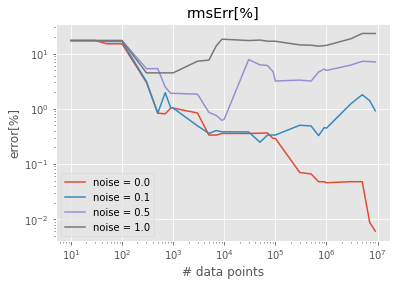

In [61]:
# loading data
noise00 = MyData('numberAnalysis00')
noise01 = MyData('numberAnalysis01')
noise05 = MyData('numberAnalysis05')
noise10 = MyData('numberAnalysis10')

list = [noise00, noise01, noise05, noise10]

# plotting 
plt.figure(figsize=(6, 4))
for data in list:
    plt.plot(data.datanum, data.rmsErr, label='noise = ' + str(data.dummy_noise[0]))

plt.title('rmsErr')
plt.ylabel('error')
plt.xlabel('# data points')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

plt.figure(figsize=(6, 4))
for data in list:
    plt.plot(data.datanum, data.rmsPoiErr, label = 'noise = ' + str(data.dummy_noise[0]))

plt.title('rmsPoiErr')
plt.ylabel('error')
plt.xlabel('# data points')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')


plt.figure(figsize=(6, 4))
for data in list:
    plt.plot(data.datanum, data.rmsErrPerc, label = 'noise = ' + str(data.dummy_noise[0]))

plt.title('rmsErr[%]')
plt.grid(True)
plt.ylabel('error[%]')
plt.xlabel('# data points')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')


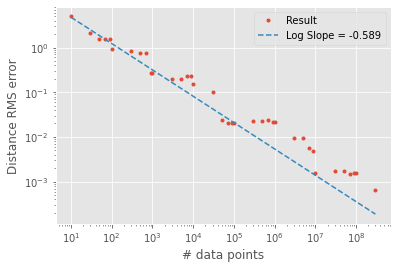

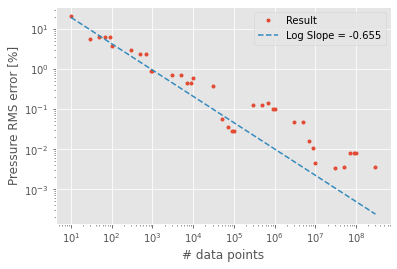

In [81]:
numAna = MyData('numberAnalysis')
import math

from scipy.optimize import curve_fit

def test_func(x, a, b, c):
    return a*(x**b)

# rmsPoiErr
params, params_covariance = curve_fit(test_func, numAna.datanum, numAna.rmsPoiErr, p0=(10, -1, 0))
plt.figure(figsize=(6, 4))
plt.plot(numAna.datanum, numAna.rmsPoiErr, ".", label='Result')
plt.plot(numAna.datanum, test_func(numAna.datanum, params[0], params[1], params[2]), "--",
         label='Log Slope = '+str(round(params[1],3)))

# plt.title('rmsPoiErr')
plt.ylabel('Distance RMS error')
plt.xlabel('# data points')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

# rmsErr%
params, params_covariance = curve_fit(test_func, numAna.datanum, numAna.rmsErrPerc, p0=(10, -1, 0))

plt.figure(figsize=(6, 4))
plt.plot(numAna.datanum, numAna.rmsErrPerc, ".", label='Result')
plt.plot(numAna.datanum, test_func(numAna.datanum, params[0], params[1], params[2]), "--",
         label='Log Slope = '+str(round(params[1],3)))

# plt.title('rmsErr[%]')
plt.grid(True)
plt.ylabel('Pressure RMS error [%]')
plt.xlabel('# data points')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')


# Run Analysis

varying noise

In [51]:
in_order = 1
in_k = -3
in_range = 4
in_count = 10000
# in_noise = 0

!rm sumanalys.csv
!rm errors*

for i in range(0,200):
    in_noise = i * 0.01
    !poisson_dd_H -file_name analysis_mesh.h5m -my_order {in_order} -my_dummy_k {in_k} -my_dummy_range {in_range} -my_dummy_count {in_count} -my_dummy_noise {in_noise} -skip_vtk 1

!mv ./sumanalys.csv ./noiseAnalysis.csv

] <inform> [petsc]   1 KSP Residual norm 1.403235255431e-14 
[0] <inform> [petsc] Linear solve converged due to CONVERGED_ATOL iterations 1
[0] <inform> [petsc]   0 KSP Residual norm 3.593458808877e+00 
[0] <inform> [petsc]   1 KSP Residual norm 1.325657891007e-14 
[0] <inform> [petsc] Linear solve converged due to CONVERGED_ATOL iterations 1
[0] <inform> [petsc]   0 KSP Residual norm 3.593458808877e+00 
[0] <inform> [petsc]   1 KSP Residual norm 1.325657891007e-14 
[0] <inform> [petsc] Linear solve converged due to CONVERGED_ATOL iterations 1
[0] <inform> [petsc]   0 KSP Residual norm 3.593458808877e+00 
[0] <inform> [petsc]   1 KSP Residual norm 1.325657891007e-14 
[0] <inform> [petsc] Linear solve converged due to CONVERGED_ATOL iterations 1
[0] <inform> MoFEM version 0.10.0 (MOAB 5.1.0 Petsc Release Version 3.11.3, Jun, 26, 2019 )
[0] <inform> git commit id 064a7859c24c245cece2e22f4476c3c622f73af5
[0] <inform> Local time: 2020-11-5 14:7:20
[0] <inform> UTC time: 2020-11-5 14:7:20
[

[ 0.76389129 -0.17884019 -0.14110272]


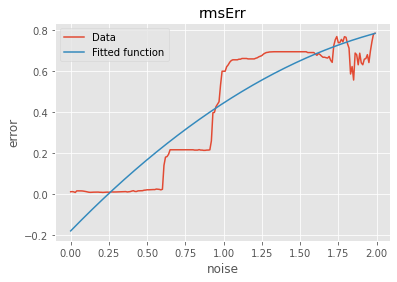

[0.16589504 0.0867676  0.04094249]


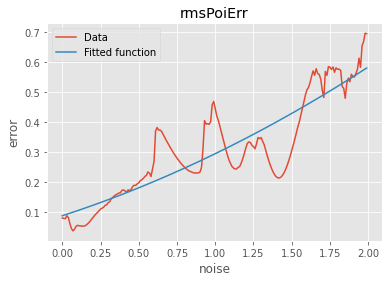

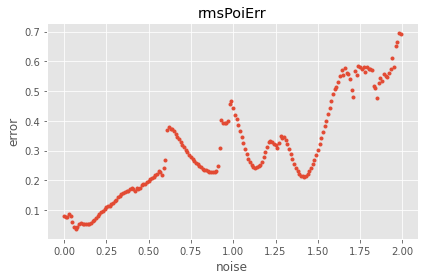

In [82]:
noiseAna = MyData('noiseAnalysis')

def test_func(x, a, b, c):
    # return a*np.exp(pow(x,b))+c
    return a*x + b + c*x**2

# rmsErr
params, params_covariance = curve_fit(test_func, noiseAna.dummy_noise, noiseAna.rmsErr, p0=(10, -1, 0))
print(params)

plt.figure(figsize=(6, 4))
plt.plot(noiseAna.dummy_noise, noiseAna.rmsErr, label='Data')
plt.plot(noiseAna.dummy_noise, test_func(noiseAna.dummy_noise, params[0], params[1], params[2]),
         label='Fitted function')

plt.title('rmsErr')
plt.ylabel('error')
plt.xlabel('noise')
# plt.xscale('log')
# plt.yscale('log')
plt.legend(loc='best')

plt.show()

# rmsPoiErr
params, params_covariance = curve_fit(test_func, noiseAna.dummy_noise, noiseAna.rmsPoiErr, p0=(10, -1, 0))
print(params)

plt.figure(figsize=(6, 4))
plt.plot(noiseAna.dummy_noise, noiseAna.rmsPoiErr, label='Data')
plt.plot(noiseAna.dummy_noise, test_func(noiseAna.dummy_noise, params[0], params[1], params[2]),
         label='Fitted function')

plt.title('rmsPoiErr')
plt.ylabel('error')
plt.xlabel('noise')
# plt.xscale('log')
# plt.yscale('log')
plt.legend(loc='best')

# new bits [end]

plt.figure()
# plt.plot(dummy_noise, rmsErr)
plt.plot(noiseAna.dummy_noise, noiseAna.rmsErr, "C0.", label="rmsErr")

plt.title('rmsErr')
plt.ylabel('error')
plt.xlabel('noise')
plt.grid(True)
# plt.xscale('log')
# plt.yscale('log')

plt.figure()
plt.plot(noiseAna.dummy_noise, noiseAna.rmsPoiErr, "C0.", label="rmsPoiErr")

plt.title('rmsPoiErr')
plt.ylabel('error')
plt.xlabel('noise')
plt.grid(True)
# plt.xscale('log')
# plt.yscale('log')

plt.tight_layout()